In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gallstone.csv')

In [3]:
X = df.drop('Gallstone Status', axis=1)
y = df['Gallstone Status']

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc


In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear'))
])

In [7]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(solver='liblinear'))])

In [10]:
y_pred = model_pipeline.predict(test_X)
y_pred_proba = model_pipeline.predict_proba(test_X)[:,1]

print("\n Classification Report:\n", classification_report(test_y, y_pred))
print("==="*30)
print(f"ROC AUC Score: {roc_auc_score(test_y, y_pred_proba):.4f}")
print("==="*30)


 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.81        33
           1       0.84      0.68      0.75        31

    accuracy                           0.78        64
   macro avg       0.79      0.78      0.78        64
weighted avg       0.79      0.78      0.78        64

ROC AUC Score: 0.8700


In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
params= {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
}

In [13]:
# map the grid parameters with pipeline

grid = GridSearchCV(estimator=model_pipeline, param_grid=params, cv=5, scoring='roc_auc')

In [14]:
grid.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [15]:
# get the best parameter

grid.best_params_

{'model__C': 1, 'model__penalty': 'l2'}

In [16]:
y_pred = model_pipeline.predict(test_X)
y_pred_proba = model_pipeline.predict_proba(test_X)[:,1]

In [139]:
model = LogisticRegression(C=1, penalty='l2', solver='liblinear', class_weight='balanced', max_iter=1000)
model.fit(train_X, train_y)

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))

y_pred = model.predict(test_X)
print(classification_report(test_y, y_pred))

roc_auc = roc_auc_score(test_y, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[30  3]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.79      0.71      0.75        31

    accuracy                           0.77        64
   macro avg       0.77      0.76      0.76        64
weighted avg       0.77      0.77      0.76        64

ROC AUC Score: 0.9013


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
param_2 = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [5, 10, 15]
}

In [55]:
# map the grid parameters with pipeline

grid_RF = GridSearchCV(RandomForestClassifier(), param_grid=param_2, cv=5, scoring='roc_auc')

In [56]:
grid_RF.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='roc_auc')

In [57]:
grid_RF.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 300}

In [59]:
model_RF = RandomForestClassifier(n_estimators=300, max_depth=5, min_samples_leaf=5,random_state=42)
model_RF.fit(train_X, train_y)

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))

y_pred = model_RF.predict(test_X)
print(classification_report(test_y, y_pred))

roc_auc = roc_auc_score(test_y, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[28  5]
 [ 7 24]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.83      0.77      0.80        31

    accuracy                           0.81        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.81      0.81      0.81        64

ROC AUC Score: 0.8700


In [60]:
from xgboost import XGBClassifier

In [66]:
param_3 = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 1, 5],
}

In [67]:
# map the grid parameters with pipeline

grid_XGB = GridSearchCV(XGBClassifier(), param_grid=param_3, cv=5, scoring='roc_auc')

In [68]:
grid_XGB.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [0, 1, 5], 'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='roc_auc')

In [69]:
grid_XGB.best_params_

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [70]:
model_XGB = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.1, random_state=42)
model_XGB.fit(train_X, train_y)

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))

y_pred = model_XGB.predict(test_X)
print(classification_report(test_y, y_pred))

roc_auc = roc_auc_score(test_y, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[30  3]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.90      0.87      0.89        31

    accuracy                           0.89        64
   macro avg       0.89      0.89      0.89        64
weighted avg       0.89      0.89      0.89        64

ROC AUC Score: 0.8700


In [82]:
y_pred_proba = model_XGB.predict_proba(test_X)[:,1]
y_pred_threshold = (y_pred_proba >= 0.35).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred_threshold))

y_pred = model_XGB.predict(test_X)
print(classification_report(test_y, y_pred_threshold))

roc_auc = roc_auc_score(test_y, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[27  6]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.82      0.90      0.86        31

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64

ROC AUC Score: 0.9013


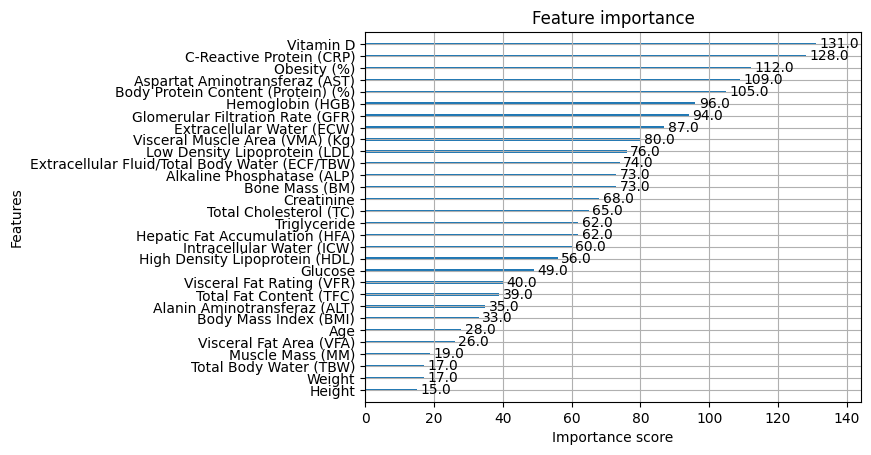

In [98]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model_XGB, max_num_features=30)
plt.show()

In [126]:
test= pd.DataFrame([{
    'Age': 55,
    'Gender': 0,
    'Comorbidity': 2,
    'Coronary Artery Disease (CAD)': 0,
    'Hypothyroidism': 0,
    'Hyperlipidemia': 1,
    'Diabetes Mellitus (DM)': 1,
    'Height': 158,
    'Weight': 84.0,
    'Body Mass Index (BMI)': 33.6,
    'Total Body Water (TBW)': 38.5,
    'Extracellular Water (ECW)': 16.0,
    'Intracellular Water (ICW)': 22.5,
    'Extracellular Fluid/Total Body Water (ECF/TBW)': 41.5,
    'Total Body Fat Ratio (TBFR) (%)': 39.0,
    'Lean Mass (LM) (%)': 61.0,
    'Body Protein Content (Protein) (%)': 17.0,
    'Visceral Fat Rating (VFR)': 13,
    'Bone Mass (BM)': 2.4,
    'Muscle Mass (MM)': 46.0,
    'Obesity (%)': 35.2,
    'Total Fat Content (TFC)': 30.5,
    'Visceral Fat Area (VFA)': 17.0,
    'Visceral Muscle Area (VMA) (Kg)': 26.0,
    'Hepatic Fat Accumulation (HFA)': 1,
    'Glucose': 118,
    'Total Cholesterol (TC)': 235,
    'Low Density Lipoprotein (LDL)': 148,
    'High Density Lipoprotein (HDL)': 37,
    'Triglyceride': 220,
    'Aspartat Aminotransferaz (AST)': 34,
    'Alanin Aminotransferaz (ALT)': 49,
    'Alkaline Phosphatase (ALP)': 85,
    'Creatinine': 0.9,
    'Glomerular Filtration Rate (GFR)': 86,
    'C-Reactive Protein (CRP)': 2.5,
    'Hemoglobin (HGB)': 12.8,
    'Vitamin D': 17.2
}])

In [138]:
# Predict class label
pred_class = model.predict(test)
print("Predicted Class:", pred_class[0])

# Predict probability
pred_proba = model.predict_proba(test)[:, 1]
print("Probability of Positive Class:", pred_proba[0])


Predicted Class: 1
Probability of Positive Class: 0.9964680517856069


In [135]:
import joblib

In [140]:
joblib.dump(model_XGB,'model_gallstone.pkl')

['model_gallstone.pkl']